In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rosbag
import pymap3d as pm

from scipy.signal import savgol_filter
%matplotlib inline

def wrap_angle(angle):
    return (angle + np.pi) % (2 * np.pi) - np.pi

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
def wrap_angle(angle):
    return (angle + np.pi) % (2 * np.pi) - np.pi

def to_euler(x, y, z, w):
    """Return as xyz (roll pitch yaw) Euler angles."""
    roll = np.arctan2(2 * (w * x + y * z), 1 - 2 * (x**2 + y**2))
    pitch = np.arcsin(2 * (w * y - z * x))
    yaw = np.arctan2(2 * (w * z + x * y), 1 - 2 * (y**2 + z**2))
    return np.array([roll, pitch, yaw])

In [3]:
bag = rosbag.Bag('COBA_WP_BARU_1.bag')
# print(bag)

# EKF

In [4]:
t = []
x = []
y = []
vx = []
vy = []
yaw = []
yaw_compass = []
for topic, msg, _ in bag.read_messages(topics=['/state_2d_new']):
    t.append(msg.header.stamp.to_sec())
    x.append(msg.px)
    y.append(msg.py)
    vx.append(msg.vx)
    vy.append(msg.vy)
    yaw.append(msg.yaw)
    yaw_compass.append(msg.yaw_imu)
t = np.array(t)
x = np.array(x)
y = np.array(y)
vx = np.array(vx)
vy = np.array(vy)
yaw = np.array(yaw)
yaw_compass = np.array(yaw_compass)

(-94.94154930114746,
 -65.96503562927245,
 175.59102783203124,
 204.56754150390626)

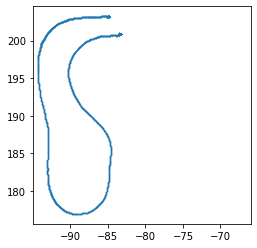

In [5]:
plt.scatter(x, y, s=0.1)
plt.axis('square')

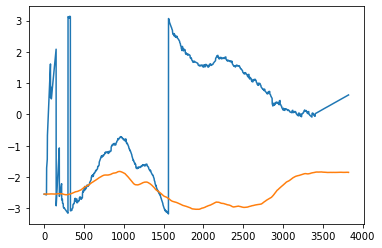

In [6]:
plt.plot(yaw)
plt.plot(yaw_compass)

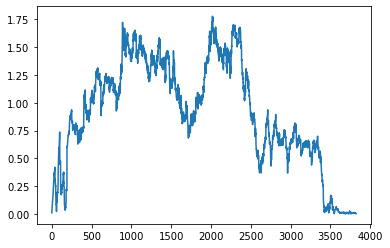

In [7]:
plt.plot(np.sqrt(vx**2 + vy**2))

# CONTROL

In [8]:
cs_t = []
cs_error_lateral = []
cs_error_yaw = []
cs_x = []
cs_y = []
cs_r_x = []
cs_r_y = []
for topic, msg, _ in bag.read_messages(topics=['/control_signal']):
    cs_t.append(msg.header.stamp.to_sec())
    cs_error_lateral.append(msg.error_lateral)
    cs_error_yaw.append(msg.error_yaw)
    cs_x.append(msg.actual_x)
    cs_y.append(msg.actual_y)
    cs_r_x.append(msg.ref_x)
    cs_r_y.append(msg.ref_y)
cs_t = np.array(cs_t)
cs_error_lateral = np.array(cs_error_lateral)
cs_error_yaw = np.array(cs_error_yaw)

(-95.0551643371582, -65.83302383422853, 175.35349884033204, 204.5756393432617)

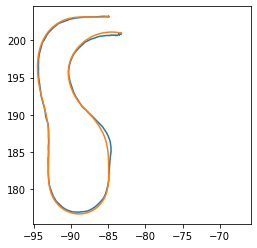

In [9]:
plt.plot(cs_x, cs_y)
plt.plot(cs_r_x, cs_r_y)
plt.axis('square')

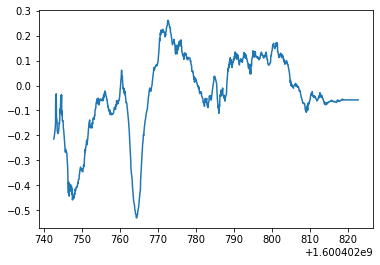

In [10]:
plt.plot(cs_t, cs_error_lateral)

(-25.0, 25.0)

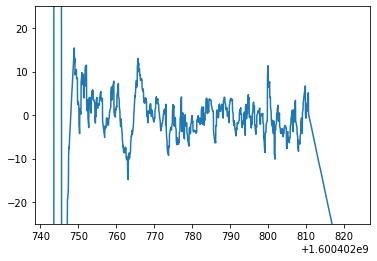

In [11]:
plt.plot(cs_t, cs_error_yaw*180/np.pi)
plt.ylim(-25, 25)